In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json
from sqlalchemy import create_engine
#import pymysql
import warnings
warnings.filterwarnings('ignore')

In [23]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration \
WHERE label IN ('aws', 'aws-OCR', 'azure', 'azure-OCR', 'gc', 'gc-OCR') \
and dataset IN ('KAIST', 'neocr_dataset')"
pandasDf =  pd.read_sql(insert_query, con=db_conn)

In [173]:
# Time Taken
pdOcrSuccess_original = pandasDf[pandasDf['status']=='0']
pdOcrSuccess_original.loc[pdOcrSuccess_original.label == 'aws-OCR', 'label'] = 'aws'
pdOcrSuccess_original.loc[pdOcrSuccess_original.label == 'azure-OCR', 'label'] = 'azure'
pdOcrSuccess_original.loc[pdOcrSuccess_original.label == 'gc-OCR', 'label'] = 'gc'
pdOcrSuccess_original['time']=pdOcrSuccess_original['time'].astype('float64')
pdOcrSuccess_original['score']=pdOcrSuccess_original['score'].astype('float64')
pdOcrSuccess_original['type'] = 'Original' 
pdOcrSuccess_original = pdOcrSuccess_original[['dataset', 'time', 'score', 'status', 'label', 'type']]

In [174]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration1;"
pandasDf_noisy =  pd.read_sql(insert_query, con=db_conn)
pdOcrSuccess_noisy = pandasDf_noisy[pandasDf_noisy['status']=='0']
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'aws-plain-OCR-noisy', 'label'] = 'aws'
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'azure-OCR-noisy', 'label'] = 'azure'
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'azure-plain-OCR-noisy', 'label'] = 'azure'
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'aws-OCR-noisy', 'label'] = 'aws'
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'gc-plain-OCR-noisy', 'label'] = 'gc'
pdOcrSuccess_noisy.loc[pdOcrSuccess_noisy.label == 'gc-OCR-noisy', 'label'] = 'gc'
pdOcrSuccess_noisy['type'] = 'Noisy'
pdOcrSuccess_noisy['time']=pdOcrSuccess_noisy['time'].astype('float64')
pdOcrSuccess_noisy['score']=pdOcrSuccess_noisy['score'].astype('float64')
pdOcrSuccess_noisy = pdOcrSuccess_noisy[['dataset', 'time', 'score', 'status', 'label', 'type']]
pd_merged = pd.concat([pdOcrSuccess_noisy, pdOcrSuccess_original])

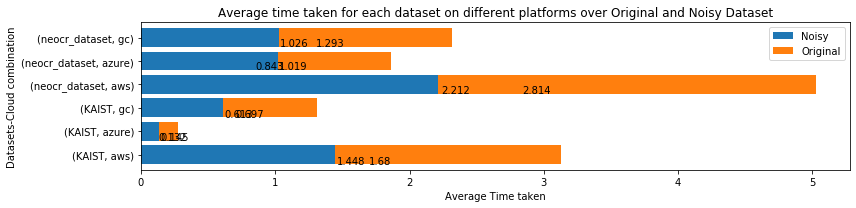

In [220]:
pd_merged_pivot = pd.pivot_table(pd_merged, index= ['dataset', 'label'], columns=['type'], values='time', aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', stacked=True, figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Datasets-Cloud combination')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for each dataset on different platforms over Original and Noisy Dataset')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

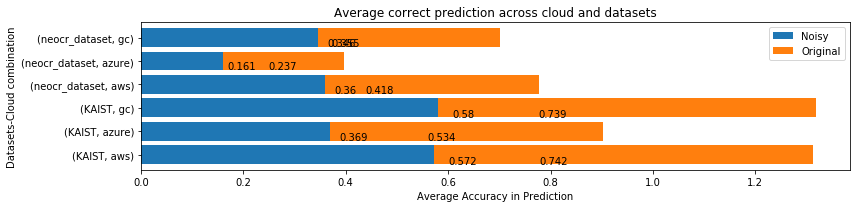

In [218]:
pd_merged_pivot = pd.pivot_table(pd_merged, index= ['dataset', 'label'], columns=['type'], values='score', aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', stacked=True, figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Datasets-Cloud combination')
ax.set_xlabel('Average Accuracy in Prediction')
ax.set_title('Average correct prediction across cloud and datasets')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.05, p.get_y()*1.01, str(round(p.get_width(), 3)))